In [47]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [48]:
y = train_data[['label']]
train_data = train_data.drop(['label'], axis = 1)
X = train_data
X_test = test_data

In [49]:
#Normalizing the data
X = X / 255.0
X_test = X_test / 255.0

In [50]:
#Reshaping the data from 28 * 28 to 28 * 28 *1
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [51]:
#One hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 10)

In [52]:
#DATA AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
               rotation_range = 40,
               width_shift_range = 0.2,
               height_shift_range = 0.2,
               shear_range = 0.2,
               zoom_range = 0.2,
               horizontal_flip = False,
               vertical_flip = False,
               fill_mode = 'nearest')

image_gen.fit(X)
   


In [53]:
#Display augmented images
def PlotImages(image):
    fig, ax = plt.subplots(1, 5, figsize = (20,20))
    ax = ax.flatten()
    for img, axes in zip(image, ax):
        axes.imshow(img)
    plt.tight_layout()
    plt.show()

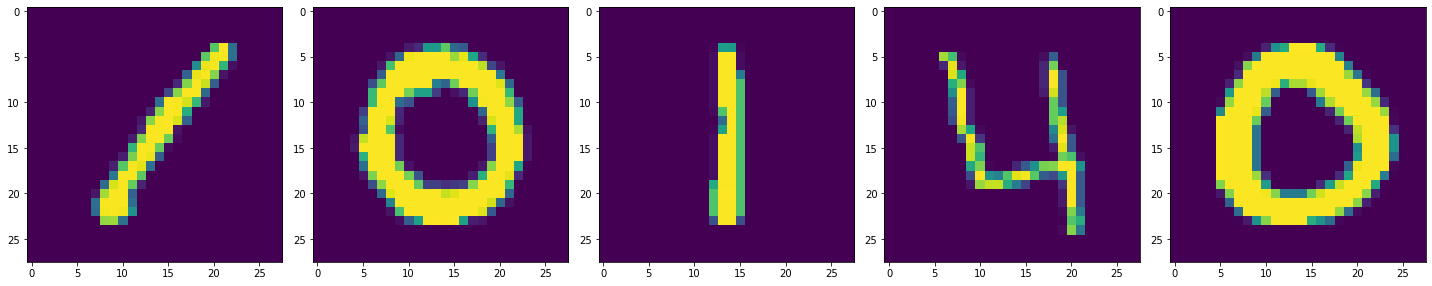

In [54]:
augmented_images = [X[i][:,:,0] for i in range(5)]
PlotImages(augmented_images)

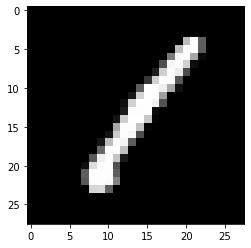

In [55]:
import matplotlib.pyplot as plt
plt.imshow(X[0][:,:,0], cmap = 'gray')

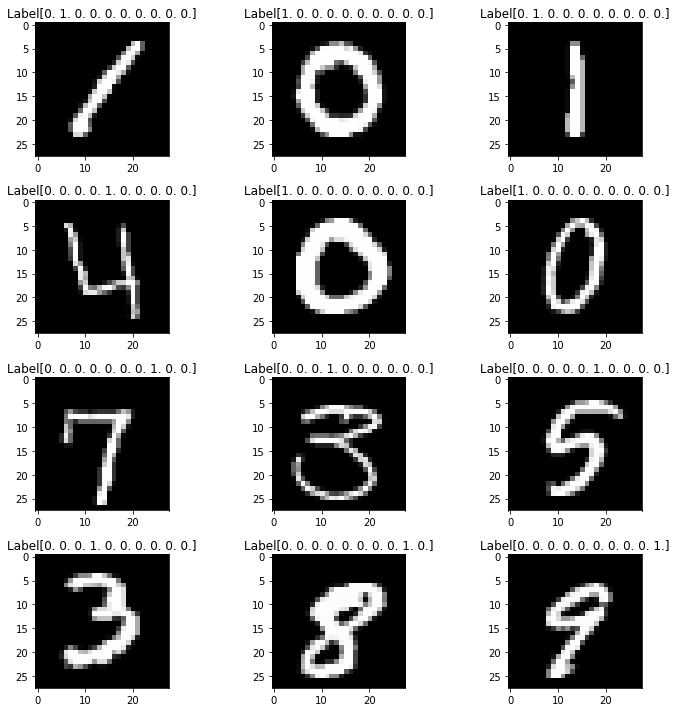

In [56]:
#display multiple images using subplot
import numpy as np
rows = 4
cols = 3
ax = []
fig = plt.figure(figsize = (10,10))
for i in range(rows * cols):
    ax.append(fig.add_subplot(rows, cols, i+1))
    ax[-1].set_title("Label" + str(y[i]))
    plt.imshow(X[i][:,:,0], cmap = 'gray')
fig.tight_layout()
plt.show()    

In [57]:
#find no. of occurences of labels
import numpy as np
array, counts = np.unique(y, return_counts = True)
counts 

array([378000,  42000], dtype=int64)

In [58]:
#split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state = 4)

In [59]:
print('Length Of X_train and X_val are {} and {}'.format(len(X_train), len(X_val)))

Length Of X_train and X_val are 37800 and 4200


Define the CNN Model

In [60]:
# CNN architechture

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = keras.Sequential(
     [
         layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
         layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu'),
         layers.MaxPool2D(pool_size = (2,2)),
         layers.Dropout(0.25),
         
         layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
         layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
         layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
         layers.Dropout(0.25),
         
         layers.Flatten(),
         layers.Dense(256, activation = 'relu'),
         layers.Dropout(0.50),
         layers.Dense(10, activation = 'softmax')
         
     ])

In [61]:
#optimizers
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [62]:
#compiling the model by choosing optimizers, loss and metrics.
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [63]:
# set a learning rate annealer
learning_rate_annealer = ReduceLROnPlateau(
                             monitor = 'val_acc',
                             patience = 3,
                             verbose = 1,
                             factor = 0.5,
                             min_lr = 0.00001)


In [64]:
#set epochs and batch size
epochs = 30
batch_size = 64


In [65]:
#early stopping callback
early_stopping = keras.callbacks.EarlyStopping(patience = 5)


In [66]:
#Model checkpoint callback
model_checkpoint = keras.callbacks.ModelCheckpoint(
                           'my_checkpoint.h5', monitor = 'val_loss', save_best_only = True)

In [67]:
history = model.fit_generator( image_gen.flow(X_train, Y_train, batch_size = batch_size),
                               epochs = epochs,
                               validation_data = (X_val, Y_val),
                               verbose = 2,
                               steps_per_epoch = int(X_train.shape[0]//batch_size),
                               callbacks = [learning_rate_annealer,
                                            model_checkpoint])

Epoch 1/30
590/590 - 262s - loss: 0.8850 - acc: 0.7068 - val_loss: 0.1608 - val_acc: 0.9490
Epoch 2/30
590/590 - 257s - loss: 0.2892 - acc: 0.9132 - val_loss: 0.0798 - val_acc: 0.9748
Epoch 3/30
590/590 - 256s - loss: 0.2160 - acc: 0.9340 - val_loss: 0.1059 - val_acc: 0.9729
Epoch 4/30
590/590 - 255s - loss: 0.1819 - acc: 0.9477 - val_loss: 0.0983 - val_acc: 0.9745
Epoch 5/30
590/590 - 255s - loss: 0.1644 - acc: 0.9526 - val_loss: 0.0791 - val_acc: 0.9795
Epoch 6/30
590/590 - 256s - loss: 0.1591 - acc: 0.9560 - val_loss: 0.0745 - val_acc: 0.9821
Epoch 7/30
590/590 - 256s - loss: 0.1535 - acc: 0.9579 - val_loss: 0.0974 - val_acc: 0.9783
Epoch 8/30
590/590 - 255s - loss: 0.1549 - acc: 0.9583 - val_loss: 0.0618 - val_acc: 0.9860
Epoch 9/30
590/590 - 255s - loss: 0.1568 - acc: 0.9582 - val_loss: 0.0747 - val_acc: 0.9805
Epoch 10/30
590/590 - 256s - loss: 0.1544 - acc: 0.9592 - val_loss: 0.0739 - val_acc: 0.9805
Epoch 11/30

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0005000

In [68]:
best_model = keras.models.load_model('my_checkpoint.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [69]:
# saving model using joblib
#from sklearn.externals import joblib
#joblib.dump(best_model, 'kaggle_model.pkl')

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


TypeError: can't pickle _thread.RLock objects

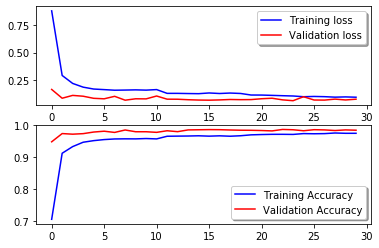

In [71]:
#plot loss and accuracy curves
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color = 'b', label = 'Training loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'Validation loss')
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['acc'], color = 'b', label = 'Training Accuracy')
ax[1].plot(history.history['val_acc'], color = 'r', label = 'Validation Accuracy')
legend = ax[1].legend(loc = 'best', shadow = True)

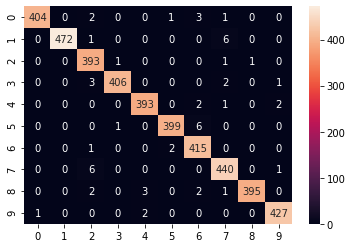

In [70]:
#plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
Y_pred = best_model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(confusion_mtx, annot = True, fmt = 'd')
